# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
!pip install fbprophet

In [ ]:
!pip install localpip

In [ ]:
!localpip install fbprophet

In [ ]:
!pip install prophet

In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [3]:
df = pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-01,272.579987,277.579987,266.149994,277.160004,277.160004,54287000
1,2022-09-02,281.070007,282.350006,269.079987,270.209991,270.209991,50890100
2,2022-09-06,272.679993,275.989990,265.739990,274.420013,274.420013,55860000
3,2022-09-07,273.100006,283.839996,272.269989,283.700012,283.700012,50028900
4,2022-09-08,281.299988,289.500000,279.760010,289.260010,289.260010,53713100
...,...,...,...,...,...,...,...
246,2023-08-25,231.309998,239.000000,230.350006,238.589996,238.589996,106612200
247,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700
248,2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600
249,2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,208.131833,212.728406,203.322390,208.163665,208.163665,1.283639e+08
std,47.724914,48.222393,47.326694,47.812623,47.812623,4.644206e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.867460e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,9.539030e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.223345e+08
75%,248.735001,253.034996,242.014999,249.569999,249.569999,1.599710e+08
max,308.290009,313.799988,305.579987,309.070007,309.070007,3.065906e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [7]:
px.area(df, x='Date', y='Close')

In [8]:
px.line(df, x='Date', y='Close')

In [9]:
px.area(df, x='Date', y="Volume")

In [10]:
px.bar(df, y="Volume")

In [11]:
px.box(df, y="Close")

# Understanding Facebook Prophet

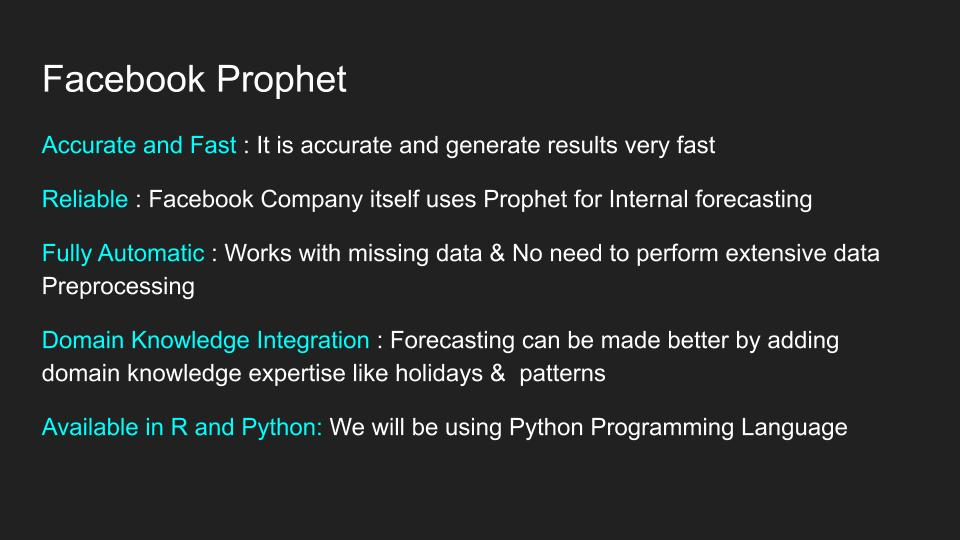

## Data Preperation

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-01,272.579987,277.579987,266.149994,277.160004,277.160004,54287000
1,2022-09-02,281.070007,282.350006,269.079987,270.209991,270.209991,50890100
2,2022-09-06,272.679993,275.989990,265.739990,274.420013,274.420013,55860000
3,2022-09-07,273.100006,283.839996,272.269989,283.700012,283.700012,50028900
4,2022-09-08,281.299988,289.500000,279.760010,289.260010,289.260010,53713100
...,...,...,...,...,...,...,...
246,2023-08-25,231.309998,239.000000,230.350006,238.589996,238.589996,106612200
247,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700
248,2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600
249,2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400


In [15]:
ndf = pd.DataFrame(df, columns = ['Date','Close'])
ndf

,Date,Close
0,2022-09-01,277.160004
1,2022-09-02,270.209991
2,2022-09-06,274.420013
3,2022-09-07,283.700012
4,2022-09-08,289.260010
...,...,...
246,2023-08-25,238.589996
247,2023-08-28,238.820007
248,2023-08-29,257.179993
249,2023-08-30,256.899994


In [17]:
prophet_df = ndf.rename(columns={"Date":'ds', 'Close':'y'})
prophet_df

,ds,y
0,2022-09-01,277.160004
1,2022-09-02,270.209991
2,2022-09-06,274.420013
3,2022-09-07,283.700012
4,2022-09-08,289.260010
...,...,...
246,2023-08-25,238.589996
247,2023-08-28,238.820007
248,2023-08-29,257.179993
249,2023-08-30,256.899994


## Creating Facebook Prophet Model

In [18]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcapjme01/gxvfplqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcapjme01/efjkca0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14605', 'data', 'file=/tmp/tmpcapjme01/gxvfplqn.json', 'init=/tmp/tmpcapjme01/efjkca0g.json', 'output', 'file=/tmp/tmpcapjme01/prophet_modeld9lxodto/prophet_model-20230904162207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [20]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-09-01,285.597067,255.092044,317.929296,285.597067,285.597067,0.891942,0.891942,0.891942,0.891942,0.891942,0.891942,0.0,0.0,0.0,286.489009
1,2022-09-02,284.387084,253.078710,317.431728,284.387084,284.387084,1.804762,1.804762,1.804762,1.804762,1.804762,1.804762,0.0,0.0,0.0,286.191846
2,2022-09-06,279.547149,250.831610,312.827354,279.547149,279.547149,1.582000,1.582000,1.582000,1.582000,1.582000,1.582000,0.0,0.0,0.0,281.129149
3,2022-09-07,278.337166,250.074138,311.655729,278.337166,278.337166,1.987318,1.987318,1.987318,1.987318,1.987318,1.987318,0.0,0.0,0.0,280.324483
4,2022-09-08,277.127182,245.397262,310.318820,277.127182,277.127182,0.891942,0.891942,0.891942,0.891942,0.891942,0.891942,0.0,0.0,0.0,278.019124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2023-09-26,279.117893,251.397696,312.559816,276.951387,281.233901,1.582000,1.582000,1.582000,1.582000,1.582000,1.582000,0.0,0.0,0.0,280.699894
277,2023-09-27,279.661273,248.359577,313.837346,277.373843,281.900087,1.987318,1.987318,1.987318,1.987318,1.987318,1.987318,0.0,0.0,0.0,281.648591
278,2023-09-28,280.204653,251.660762,314.296551,277.789250,282.543858,0.891942,0.891942,0.891942,0.891942,0.891942,0.891942,0.0,0.0,0.0,281.096595
279,2023-09-29,280.748033,249.397555,311.504652,278.189118,283.215083,1.804762,1.804762,1.804762,1.804762,1.804762,1.804762,0.0,0.0,0.0,282.552796


In [22]:
px.line(forecast, x='ds', y='yhat')

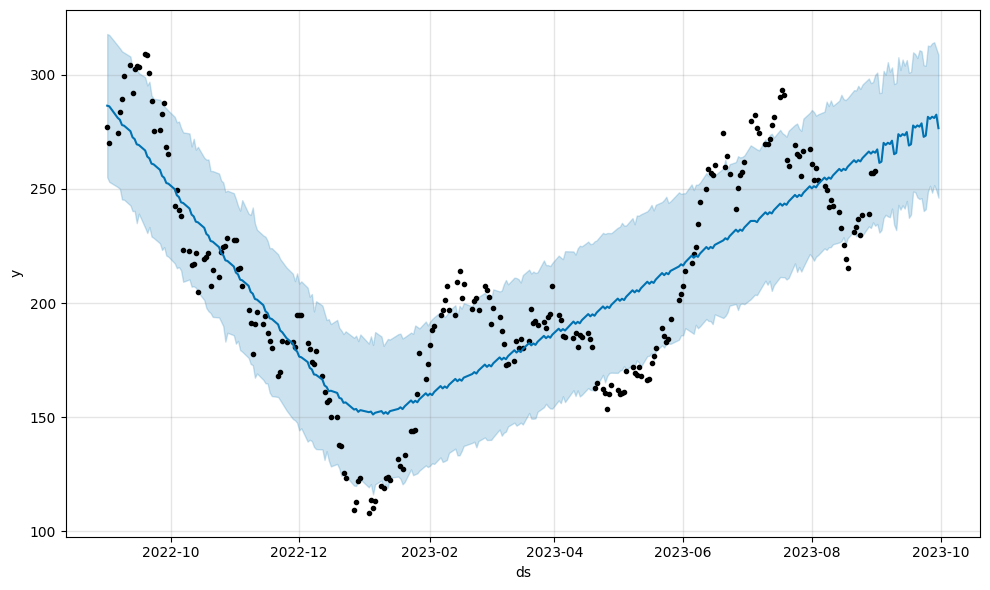

In [23]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

Black dots = Actual price of Tesla,
Blue line = forecasted price,
Shaded region = Area between yhat_upper and yhat_lower

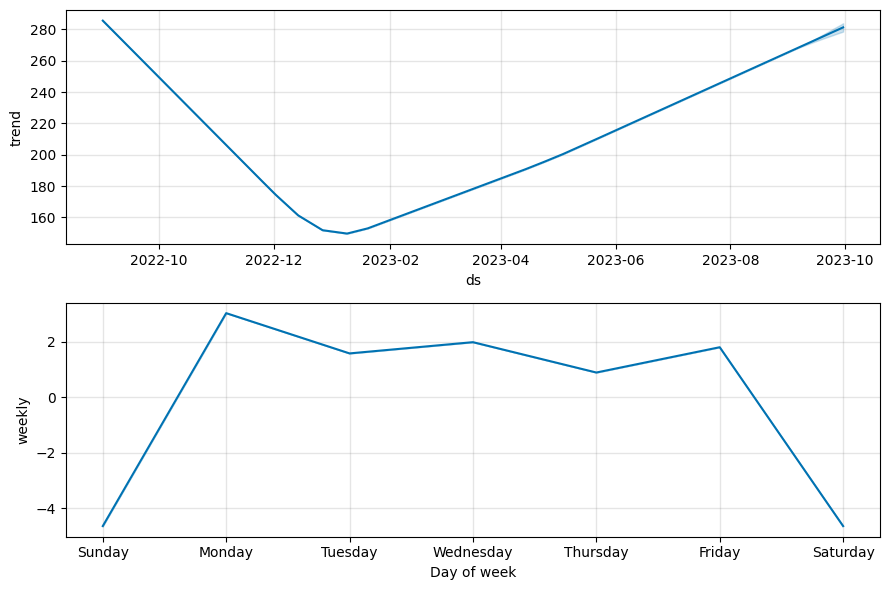

In [24]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [28]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>